In [18]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import io
from time import time

In [19]:
energy_data = pd.read_csv("../data/Appliances Energy/energydata_complete.csv", sep=',')
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
energy_data['date'] = pd.to_datetime(energy_data['date'])

In [17]:
# print ("Time Started",time())
energy_data['month'] = energy_data['date'].dt.month
energy_data['day'] = energy_data['date'].dt.day
energy_data['week'] = energy_data['date'].dt.week
energy_data['hour'] = energy_data['date'].dt.hour
energy_data['min'] = energy_data['date'].dt.minute

#energy_data['NSM'] = energy_data['Press_mm_hg']*energy_data['RH_5']
# print ("Time ended",time())

In [6]:
energy_data = energy_data.drop('date', axis = 1)

In [7]:
energy_data['month'] = energy_data['month'].astype('category')
energy_data['day']   = energy_data['day'].astype('category')
energy_data['week']  = energy_data['week'].astype('category') 
energy_data['hour']  = energy_data['hour'].astype('category') 
energy_data['min']   = energy_data['min'].astype('category')  

In [8]:
energy_data = pd.get_dummies(energy_data)
# Display the first 5 rows of the last 12 columns
energy_data.iloc[:,5:].head(5)

,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,...,hour_20,hour_21,hour_22,hour_23,min_0,min_10,min_20,min_30,min_40,min_50
0,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,...,0,0,0,0,1,0,0,0,0,0
1,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,...,0,0,0,0,0,1,0,0,0,0
2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,...,0,0,0,0,0,0,1,0,0,0
3,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,...,0,0,0,0,0,0,0,1,0,0
4,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,...,0,0,0,0,0,0,0,0,1,0


In [9]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(energy_data['Appliances'])
# Remove the labels from the features
# axis 1 refers to the columns
energy_data= energy_data.drop('Appliances', axis = 1)
# Saving feature names for later use
energydata_list = list(energy_data.columns)
# Convert to numpy array
energy_data_array = np.array(energy_data)

In [10]:
train_features, test_features, train_labels, test_labels = train_test_split(energy_data_array, labels, test_size = 0.15, random_state = 0)

In [11]:
print(len(train_features), "train +", len(test_features), "test")

16774 train + 2961 test


In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16774, 113)
Training Labels Shape: (16774,)
Testing Features Shape: (2961, 113)
Testing Labels Shape: (2961,)


In [13]:
time_Start = time()
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False).fit(train_features,train_labels)
time_Taken = time() - time_Start
print ("Time Taken without pruning",time_Taken)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Time Taken without pruning 551.928628206253


In [14]:
pred = gbm.predict(test_features)
errors = abs(pred - test_labels)
print('Mean Absolute Error on test data:', round(np.mean(errors), 2), 'Wh')
mape = 100 * (errors / test_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of test data:', round(accuracy, 2), '%.')

from sklearn.metrics import r2_score
test_acc = r2_score(test_labels,pred)

pred_train = gbm.predict(train_features)
errors = abs(pred_train - train_labels)
print('Mean Absolute Error on train data:', round(np.mean(errors), 2), 'Wh')
mape = 100 * (errors / train_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of train data:', round(accuracy, 2), '%.')
train_acc = r2_score(train_labels,pred_train)

print ("R2 score of train data" , train_acc)
print ("R2 score of test data", test_acc)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(train_labels, pred_train))
print("RMSE of train data" , rms) 
rmse = sqrt(mean_squared_error(test_labels, pred))
print("RMSE of test data" , rmse) 

Mean Absolute Error on test data: 34.67 Wh
Accuracy of test data: 66.98 %.
Mean Absolute Error on train data: 12.05 Wh
Accuracy of train data: 83.83 %.
R2 score of train data 0.9686845714895579
R2 score of test data 0.5529970134255622
RMSE of train data 17.89267336896061
RMSE of test data 73.62889523305674


     importance     variable
64     0.000094       week_3
80     0.000119      week_19
31     0.000246      month_5
41     0.000321       day_10
87     0.000397       hour_4
71     0.000401      week_10
86     0.000413       hour_3
85     0.000417       hour_2
65     0.000430       week_4
84     0.000483       hour_1
81     0.000493      week_20
59     0.000598       day_28
62     0.000627       day_31
82     0.000656      week_21
40     0.000669        day_9
83     0.000686       hour_0
27     0.000687      month_1
79     0.000699      week_18
49     0.000734       day_18
67     0.000794       week_6
106    0.000807      hour_23
58     0.000830       day_27
70     0.000868       week_9
66     0.000872       week_5
33     0.000906        day_2
60     0.000967       day_29
44     0.000973       day_13
77     0.001026      week_16
28     0.001033      month_2
88     0.001039       hour_5
..          ...          ...
111    0.005254       min_40
92     0.006159       hour_9
101    0.00809

Text(0.5,0,'Variable')

<Figure size 432x288 with 0 Axes>

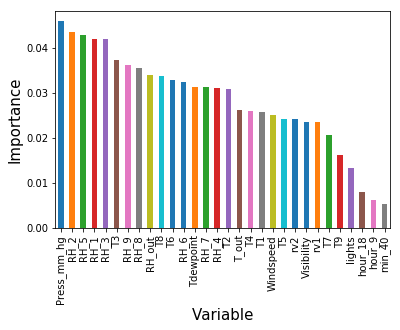

In [20]:
imp = pd.DataFrame(gbm.feature_importances_)
imp['colname'] = energydata_list
imp.columns = ['importance','variable']
imp = imp.sort_values(by = ['importance'], ascending = False)
print (imp.sort_values(by = ['importance']))
imp_plot = imp.iloc[:30,:]
print (imp.sort_values(by = ['importance']))
plt.figure()
# imp[:30].plot(kind='barh',fontsize=10)
imp.importance = imp.importance.astype(float)
imp_plot.plot(x="variable", y="importance", kind="bar", fontsize=10, legend=None)
plt.ylabel("Importance", fontsize=15)
plt.xlabel("Variable", fontsize=15)

In [ ]:
# print (imp['importance'][0])
# print (imp['variable'][0])
# print (imp)
energy_data_copy = energy_data
for i in range (0,len(imp)):
    if imp['importance'][i] < 0.01:
        energy_data_copy = energy_data_copy.drop(str(imp['variable'][i]), axis = 1)
energydata_list = list(energy_data_copy.columns)
# Convert to numpy array
energy_data_array = np.array(energy_data_copy)
print (energydata_list)

In [44]:
train_features, test_features, train_labels, test_labels = train_test_split(energy_data_array, labels, test_size = 0.15, random_state = 0)

In [45]:
print(len(train_features), "train +", len(test_features), "test")

16774 train + 2961 test


In [46]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16774, 78)
Training Labels Shape: (16774,)
Testing Features Shape: (2961, 78)
Testing Labels Shape: (2961,)


In [ ]:
time_Start = time()
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False).fit(train_features,train_labels)
time_Taken = time() - time_Start
print ("Time Taken after pruning",time_Taken)

In [ ]:
pred = gbm.predict(test_features)
errors = abs(pred - test_labels)
print('Mean Absolute Error on test data:', round(np.mean(errors), 2), 'Wh')
mape = 100 * (errors / test_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of test data:', round(accuracy, 2), '%.')

from sklearn.metrics import r2_score
test_acc = r2_score(test_labels,pred)

pred_train = gbm.predict(train_features)
errors = abs(pred_train - train_labels)
print('Mean Absolute Error on train data:', round(np.mean(errors), 2), 'Wh')
mape = 100 * (errors / train_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of train data:', round(accuracy, 2), '%.')
train_acc = r2_score(train_labels,pred_train)

print ("R2 score of train data" , train_acc)
print ("R2 score of test data", test_acc)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(train_labels, pred_train))
print("RMSE of train data" , rms) 
rmse = sqrt(mean_squared_error(test_labels, pred))
print("RMSE of test data" , rmse) 

In [ ]:
imp = pd.DataFrame(gbm.feature_importances_)
imp['colname'] = energydata_list
imp.columns = ['importance','variable']
imp = imp.sort_values(by = ['importance'], ascending = False)
print (imp.sort_values(by = ['importance']))
imp_plot = imp.iloc[:35,:]
print (imp.sort_values(by = ['importance']))
plt.figure(figsize=(80,50))
# imp[:30].plot(kind='barh',fontsize=10)
imp.importance = imp.importance.astype(float)
imp_plot.plot(x="variable", y="importance", kind="bar", fontsize=10 )
plt.ylabel("Importance", fontsize=10)
plt.xlabel("Variable", fontsize=10)